# Decision Tree Regression

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 : Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Step 2 : Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(41)

# Step 3 : Saperate X and Y(PE)

In [6]:
X = df.drop(columns=["PE"])
Y = df[["PE"]]

In [7]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [8]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4  :Apply feature engineering on X

In [9]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
pre = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [14]:
X_pre = pre.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


# Step 5 : train_test_split

In [15]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, random_state=41, test_size=0.3)

In [16]:
xtrain.head()

,AT,V,AP,RH
6148,0.367517,0.372559,-0.249067,0.895991
3719,0.674814,-0.491516,0.096139,-1.256137
3802,-0.896559,-1.066779,0.469973,0.435701
5852,-1.053562,-1.031366,0.660258,0.643927
8236,-1.005253,-0.732324,1.389401,-1.560942


In [17]:
ytrain.head()

,PE
6148,445.52
3719,447.96
3802,476.28
5852,475.19
8236,482.99


In [18]:
xtest.head()

,AT,V,AP,RH
4643,0.061562,-0.245199,-0.915905,1.284360
1174,-1.928485,-0.962901,-1.589479,0.515841
8819,1.567182,0.855749,-0.217072,-2.513029
1350,-0.970364,-1.001462,1.049246,0.890511
250,0.291029,0.862831,0.101191,-0.034178


In [19]:
ytest.head()

,PE
4643,449.03
1174,485.24
8819,435.77
1350,466.05
250,447.43


In [20]:
xtrain.shape

(6697, 4)

In [21]:
xtest.shape

(2871, 4)

# Step 6 : Model Building

In [22]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(
    max_depth=2,
    min_samples_leaf=2,
    min_samples_split=2,
    criterion="squared_error"
)
model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=2)

In [25]:
model.score(xtrain, ytrain)

0.8644669487091752

In [26]:
model.score(xtest, ytest)

0.8537481421246491

## Hyperparameter tuning

In [27]:
params = {
    "max_depth" : [2, 3, 4, 5, 6, 7],
    "min_samples_split": [ 3, 4, 5, 6, 7, 8, 9],
    "min_samples_leaf": [3, 4, 5, 6, 7, 8, 9],
    "criterion" : ["squared_error", "absolute_error"]
}

In [28]:
from sklearn.model_selection import RandomizedSearchCV

base_model = DecisionTreeRegressor()

rscv = RandomizedSearchCV(base_model, params, cv=5, scoring="r2")
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9]},
                   scoring='r2')

In [29]:
rscv.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 7,
 'criterion': 'absolute_error'}

In [30]:
rscv.best_score_

np.float64(0.9365694909455821)

In [31]:
best_dtr = rscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=3, min_samples_split=4)

# Step 7 : Ecaluate model

In [33]:
best_dtr.score(xtrain, ytrain)

0.9468539084342462

In [35]:
best_dtr.score(xtest, ytest)

0.9354600052496149

In [36]:
from sklearn.model_selection import cross_val_score

scores  = cross_val_score(best_dtr, xtrain, ytrain, cv=5, scoring="r2")

scores

array([0.93833946, 0.93625059, 0.93921025, 0.93322787, 0.93591227])

In [37]:
scores.mean()

np.float64(0.9365880885003832)

In [38]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [41]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)

    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [42]:
evaluate_model(best_dtr, xtrain, ytrain)

RMSE : 3.95
MAE : 2.83
MAPE : 0.62%
R2 : 94.69%


In [43]:
evaluate_model(best_dtr, xtest, ytest)

RMSE : 4.29
MAE : 3.19
MAPE : 0.70%
R2 : 93.55%


# Plot the tree

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

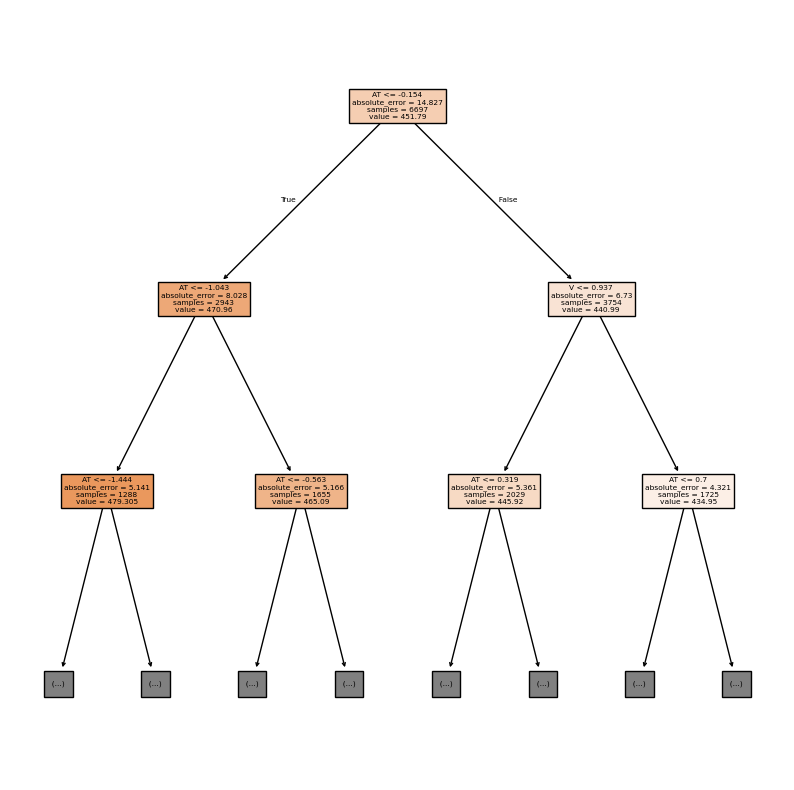

In [47]:
plt.figure(figsize=(10, 10))
plot_tree(best_dtr, feature_names=xtrain.columns, max_depth=2, filled=True)
plt.show()

In [48]:
best_dtr.feature_importances_

array([0.853397  , 0.11589971, 0.00962701, 0.02107628])

In [49]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [51]:
imp = pd.Series(best_dtr.feature_importances_, index=xtrain.columns)
imp

AT    0.853397
V     0.115900
AP    0.009627
RH    0.021076
dtype: float64

In [52]:
imp.sort_values(ascending=False)

AT    0.853397
V     0.115900
RH    0.021076
AP    0.009627
dtype: float64

<Axes: >

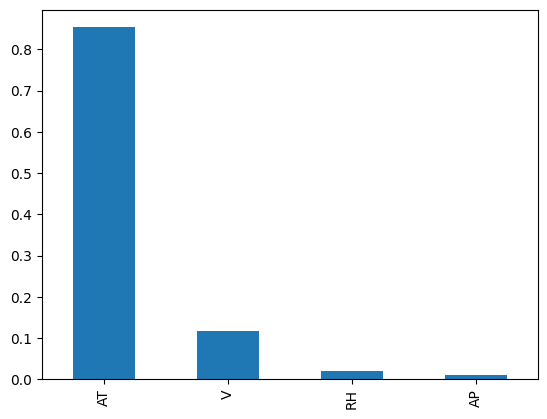

In [54]:
imp.sort_values(ascending=False).plot(kind="bar")

# Step 8 : Out of sample predictions

In [55]:
pre

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [56]:
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=3, min_samples_split=4)

In [57]:
xnew = pd.read_csv("PowerPlantTest.csv")
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [58]:
xnew_pre = pre.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.717755,-0.220804,-2.215903,-1.117091
1,1.657089,-1.047105,6.372163,0.458305
2,1.120327,-0.175160,-0.515129,0.114115


In [59]:
preds = best_dtr.predict(xnew_pre)
preds

array([444.345, 439.74 , 439.69 ])

In [60]:
xnew["PE"] = preds
xnew

,AT,V,AP,RH,PE
0,25,51.5,1000.1,57.0,444.345
1,32,41.0,1051.1,80.0,439.740
2,28,NaN,1010.2,NaN,439.690


In [61]:
xnew = xnew.round(2)

In [62]:
xnew

,AT,V,AP,RH,PE
0,25,51.5,1000.1,57.0,444.34
1,32,41.0,1051.1,80.0,439.74
2,28,NaN,1010.2,NaN,439.69


In [63]:
import joblib

In [64]:
joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [65]:
joblib.dump(best_dtr, "PowerModel.joblib")


['PowerModel.joblib']

In [66]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [67]:
m = joblib.load("PowerModel.joblib")
m

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=3, min_samples_split=4)